<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/DA1_VS_DA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Depth Anything V1
Paper: https://arxiv.org/pdf/2401.10891.pdf

In [1]:
!gdown 1L3mKl7qlUGE47wZydUST2aTXlBKpN-oI

Downloading...
From: https://drive.google.com/uc?id=1L3mKl7qlUGE47wZydUST2aTXlBKpN-oI
To: /content/img.png
100% 1.55M/1.55M [00:00<00:00, 115MB/s]


raw input (954, 1110)
raw input (954, 1110) inputs torch.Size([1, 3, 518, 602]) predicted_depth torch.Size([1, 518, 602])
Original model train on the scale of 0 to 30
prediction: min scale = 0.0 max scale= 17.623625


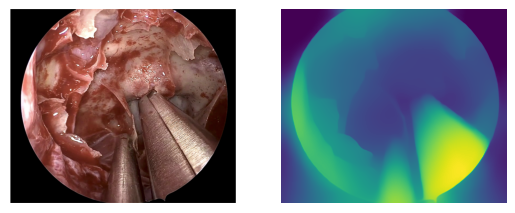

In [10]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation, DepthAnythingForDepthEstimation
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import requests
import matplotlib.pyplot as plt

url = "img.png"
image = Image.open(url).convert("RGB")

image_processor = AutoImageProcessor.from_pretrained("LiheYoung/depth-anything-small-hf")
model = DepthAnythingForDepthEstimation.from_pretrained("LiheYoung/depth-anything-small-hf")
print('raw input', image.size[::-1])

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

print('raw input', image.size[::-1],'inputs',inputs['pixel_values'].shape, 'predicted_depth', predicted_depth.shape)
prediction = predicted_depth.clone()
# interpolate to original size
# prediction = torch.nn.functional.interpolate(
#     predicted_depth.unsqueeze(1),
#     size=image.size[::-1],
#     mode="bicubic",
#     align_corners=False,
# )

# visualize the prediction
output = prediction.squeeze().cpu().numpy()

print('Original model train on the scale of 0 to 30')
print('prediction: min scale =', output.min(), 'max scale=', output.max())

#Rescale the reconstruction according to your application
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = 1/np.array(image_processor.image_std)),
                                transforms.Normalize(mean = np.array(image_processor.image_mean)*-1,
                                                     std = [ 1., 1., 1. ]),
                               ])
inv_tensor = invTrans(inputs['pixel_values'])
plt.subplot(121),plt.axis('OFF'),plt.imshow(inv_tensor.squeeze().permute(1,2,0))
plt.subplot(122),plt.axis('OFF'),plt.imshow(depth);
da_v1 = depth

raw input (954, 1110)
raw input (954, 1110) inputs torch.Size([1, 3, 518, 602]) predicted_depth torch.Size([1, 518, 602])
Original model train on the scale of 0 to 30
prediction: min scale = 0.0 max scale= 218.63155


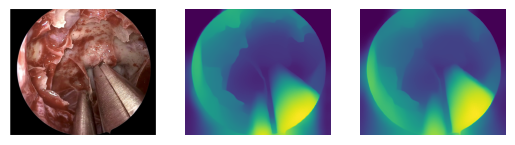

In [11]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation, DepthAnythingForDepthEstimation
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import requests
import matplotlib.pyplot as plt

url = "img.png"
image = Image.open(url).convert("RGB")

image_processor = AutoImageProcessor.from_pretrained("LiheYoung/depth-anything-large-hf")
model = DepthAnythingForDepthEstimation.from_pretrained("LiheYoung/depth-anything-large-hf")
print('raw input', image.size[::-1])

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

print('raw input', image.size[::-1],'inputs',inputs['pixel_values'].shape, 'predicted_depth', predicted_depth.shape)
prediction = predicted_depth.clone()
# interpolate to original size
# prediction = torch.nn.functional.interpolate(
#     predicted_depth.unsqueeze(1),
#     size=image.size[::-1],
#     mode="bicubic",
#     align_corners=False,
# )

# visualize the prediction
output = prediction.squeeze().cpu().numpy()

print('Original model train on the scale of 0 to 30')
print('prediction: min scale =', output.min(), 'max scale=', output.max())

#Rescale the reconstruction according to your application
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = 1/np.array(image_processor.image_std)),
                                transforms.Normalize(mean = np.array(image_processor.image_mean)*-1,
                                                     std = [ 1., 1., 1. ]),
                               ])
inv_tensor = invTrans(inputs['pixel_values'])
plt.subplot(131),plt.axis('OFF'),plt.imshow(inv_tensor.squeeze().permute(1,2,0))
plt.subplot(132),plt.axis('OFF'),plt.imshow(depth);
plt.subplot(133),plt.axis('OFF'),plt.imshow(da_v1);

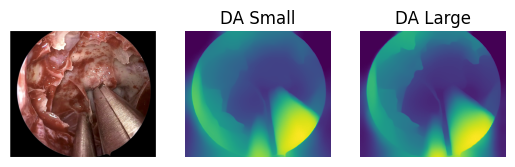

In [13]:
plt.subplot(131),plt.axis('OFF'),plt.imshow(inv_tensor.squeeze().permute(1,2,0))
plt.subplot(132),plt.axis('OFF'),plt.title('DA Small');plt.imshow(da_v1);
plt.subplot(133),plt.axis('OFF'),plt.title('DA Large');plt.imshow(depth);

raw input (954, 1110)
raw input (954, 1110) inputs torch.Size([1, 3, 518, 602]) predicted_depth torch.Size([1, 518, 602])
Original model train on the scale of 0 to 30
prediction: min scale = 0.6620687 max scale= 6.6914554


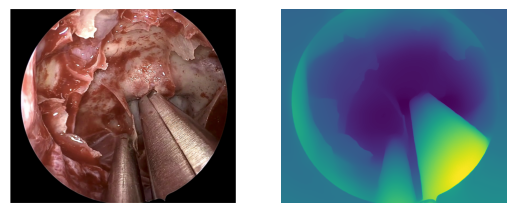

In [7]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation, DepthAnythingForDepthEstimation
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import requests
import matplotlib.pyplot as plt

url = "img.png"
image = Image.open(url).convert("RGB")

image_processor = AutoImageProcessor.from_pretrained("depth-anything/Depth-Anything-V2-Small-hf")
model = DepthAnythingForDepthEstimation.from_pretrained("depth-anything/Depth-Anything-V2-Small-hf")
print('raw input', image.size[::-1])

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

print('raw input', image.size[::-1],'inputs',inputs['pixel_values'].shape, 'predicted_depth', predicted_depth.shape)
prediction = predicted_depth.clone()
# interpolate to original size
# prediction = torch.nn.functional.interpolate(
#     predicted_depth.unsqueeze(1),
#     size=image.size[::-1],
#     mode="bicubic",
#     align_corners=False,
# )

# visualize the prediction
output = prediction.squeeze().cpu().numpy()

print('Original model train on the scale of 0 to 30')
print('prediction: min scale =', output.min(), 'max scale=', output.max())

#Rescale the reconstruction according to your application
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = 1/np.array(image_processor.image_std)),
                                transforms.Normalize(mean = np.array(image_processor.image_mean)*-1,
                                                     std = [ 1., 1., 1. ]),
                               ])
inv_tensor = invTrans(inputs['pixel_values'])
plt.subplot(121),plt.axis('OFF'),plt.imshow(inv_tensor.squeeze().permute(1,2,0))
plt.subplot(122),plt.axis('OFF'),plt.imshow(depth);

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

raw input (954, 1110)
raw input (954, 1110) inputs torch.Size([1, 3, 518, 602]) predicted_depth torch.Size([1, 518, 602])
Original model train on the scale of 0 to 30
prediction: min scale = 28.133162 max scale= 567.1909


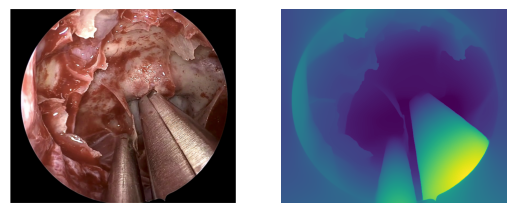

In [8]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation, DepthAnythingForDepthEstimation
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import requests
import matplotlib.pyplot as plt

url = "img.png"
image = Image.open(url).convert("RGB")

image_processor = AutoImageProcessor.from_pretrained("depth-anything/Depth-Anything-V2-Large-hf")
model = DepthAnythingForDepthEstimation.from_pretrained("depth-anything/Depth-Anything-V2-Large-hf")
print('raw input', image.size[::-1])

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

print('raw input', image.size[::-1],'inputs',inputs['pixel_values'].shape, 'predicted_depth', predicted_depth.shape)
prediction = predicted_depth.clone()
# interpolate to original size
# prediction = torch.nn.functional.interpolate(
#     predicted_depth.unsqueeze(1),
#     size=image.size[::-1],
#     mode="bicubic",
#     align_corners=False,
# )

# visualize the prediction
output = prediction.squeeze().cpu().numpy()

print('Original model train on the scale of 0 to 30')
print('prediction: min scale =', output.min(), 'max scale=', output.max())

#Rescale the reconstruction according to your application
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = 1/np.array(image_processor.image_std)),
                                transforms.Normalize(mean = np.array(image_processor.image_mean)*-1,
                                                     std = [ 1., 1., 1. ]),
                               ])
inv_tensor = invTrans(inputs['pixel_values'])
plt.subplot(121),plt.axis('OFF'),plt.imshow(inv_tensor.squeeze().permute(1,2,0))
plt.subplot(122),plt.axis('OFF'),plt.imshow(depth);